In [17]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/Users/HP/Desktop/dataset.csv")

In [4]:
df.shape

(10299, 563)

In [5]:
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [6]:
df.tail()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
10294,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,24,WALKING_UPSTAIRS
10295,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,24,WALKING_UPSTAIRS
10296,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184,24,WALKING_UPSTAIRS
10297,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,24,WALKING_UPSTAIRS
10298,0.153627,-0.018437,-0.137018,-0.330046,-0.195253,-0.164339,-0.430974,-0.218295,-0.229933,-0.111527,...,-0.436940,0.598808,-0.287951,0.876030,-0.024965,-0.660080,0.263936,0.188103,24,WALKING_UPSTAIRS


In [3]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [4]:
y = df["Activity"]

In [5]:
X = df.drop(["subject", "Activity"], axis = 1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 70)

In [7]:
print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))

X_train and y_train : ((7209, 561),(7209,))
X_test  and y_test  : ((3090, 561),(3090,))


In [8]:
svc = SVC()

In [9]:
svm_model = svc.fit(X_train, y_train)

In [10]:
y_pred = svm_model.predict(X_test)

In [11]:
accuracy_score(y_test, y_pred)

0.9640776699029127

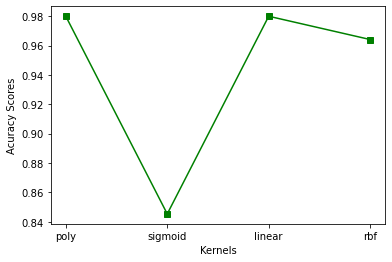

In [23]:
acc_scores = []

svm_model = SVC(kernel = "poly").fit(X_train,y_train)
y_pred = svm_model.predict(X_test)
acc_scores.append((accuracy_score(y_test,y_pred)))

svm_model = SVC(kernel = "sigmoid").fit(X_train,y_train)
y_pred = svm_model.predict(X_test)
acc_scores.append((accuracy_score(y_test,y_pred)))

svm_model = SVC(kernel = "linear").fit(X_train,y_train)
y_pred = svm_model.predict(X_test)
acc_scores.append((accuracy_score(y_test,y_pred)))

svm_model = SVC(kernel = "rbf").fit(X_train,y_train)
y_pred = svm_model.predict(X_test)
acc_scores.append((accuracy_score(y_test,y_pred)))

kernels = ["poly", "sigmoid", "linear", "rbf"]

plt.plot(kernels, acc_scores, marker = "s", color = "green")
plt.xlabel('Kernels')
plt.ylabel('Acuracy Scores')
plt.show();

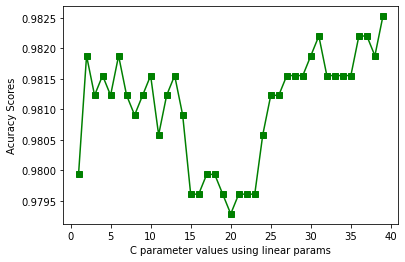

In [25]:
acc_scores = []

for n in range(1,40):
    svc = SVC(kernel = "linear", C = n).fit(X_train,y_train)
    y_pred = svc.predict(X_test)
    acc_scores.append(accuracy_score(y_test,y_pred))

plt.plot(range(1,40), acc_scores, marker = "s", color = "green")
plt.xlabel('C parameter values using linear params')
plt.ylabel('Acuracy Scores')
plt.show();

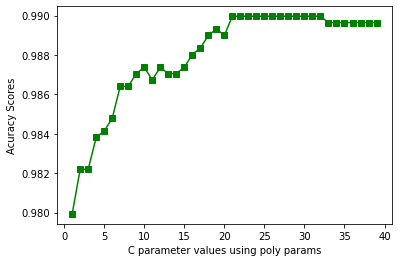

In [27]:
acc_scores = []

for n in range(1,40):
    svc = SVC(kernel = "poly", C = n).fit(X_train,y_train)
    y_pred = svc.predict(X_test)
    acc_scores.append(accuracy_score(y_test,y_pred))

plt.plot(range(1,40), acc_scores, marker = "s", color = "green")
plt.xlabel('C parameter values using poly params')
plt.ylabel('Acuracy Scores')
plt.show();

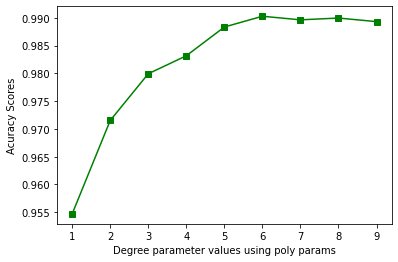

In [30]:
acc_scores = []

for d in range(1,10):
    svc = SVC(kernel = "poly", degree = d).fit(X_train,y_train)
    y_pred = svc.predict(X_test)
    acc_scores.append(accuracy_score(y_test,y_pred))

plt.plot(range(1,10), acc_scores, marker = "s", color = "green")
plt.xlabel('Degree parameter values using poly params')
plt.ylabel('Acuracy Scores')
plt.show();

In [45]:
svc_params = {"C" : [25,30,35,40],
              "kernel" : ["poly"],
              "degree" : [6]}

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
svc_cv_model = GridSearchCV(svm_model, svc_params, cv = 10, verbose = 2)

In [48]:
svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
[CV] END ........................C=25, degree=6, kernel=poly; total time=   2.0s
[CV] END ........................C=25, degree=6, kernel=poly; total time=   2.0s
[CV] END ........................C=25, degree=6, kernel=poly; total time=   1.9s
[CV] END ........................C=25, degree=6, kernel=poly; total time=   2.1s
[CV] END ........................C=25, degree=6, kernel=poly; total time=   2.0s
[CV] END ........................C=25, degree=6, kernel=poly; total time=   1.9s
[CV] END ........................C=25, degree=6, kernel=poly; total time=   2.0s
[CV] END ........................C=25, degree=6, kernel=poly; total time=   1.9s
[CV] END ........................C=25, degree=6, kernel=poly; total time=   1.9s
[CV] END ........................C=25, degree=6, kernel=poly; total time=   1.9s
[CV] END ........................C=30, degree=6, kernel=poly; total time=   2.0s
[CV] END ........................C=30, degree=6,

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [25, 30, 35, 40], 'degree': [6],
                         'kernel': ['poly']},
             verbose=2)

In [49]:
svc_cv_model.best_params_

{'C': 25, 'degree': 6, 'kernel': 'poly'}

In [12]:
svc_tuned = SVC(C = 25, degree = 6, kernel = "poly").fit(X_train, y_train)

In [13]:
y_pred = svc_tuned.predict(X_test)

In [14]:
accuracy_score(y_test, y_pred)

0.9915857605177993

In [15]:
from sklearn.metrics import confusion_matrix

cm_tree = confusion_matrix(y_test.to_numpy(), y_pred)
cm_tree

array([[575,   0,   0,   0,   0,   0],
       [  0, 544,  13,   0,   0,   0],
       [  0,  10, 548,   0,   0,   0],
       [  0,   0,   0, 518,   0,   1],
       [  0,   0,   0,   1, 402,   1],
       [  0,   0,   0,   0,   0, 477]], dtype=int64)

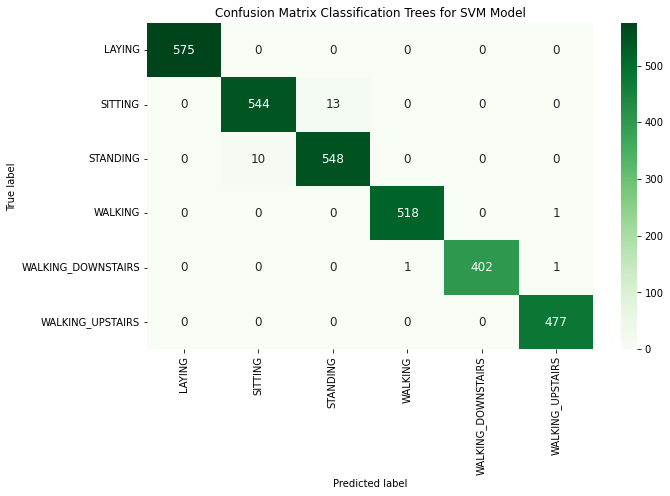

In [19]:
categories = sorted(df["Activity"].unique(), reverse=False)
df_tree = pd.DataFrame(cm_tree, index = categories, columns = categories)

plt.figure(figsize = (10,6))
sns.heatmap(df_tree, annot=True, annot_kws={"size": 12}, fmt="g", cmap="Greens")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix Classification Trees for SVM Model")
plt.show()